# Using Florence2 as Remotely Sourced Zoo Model

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

# Load a dataset
dataset = foz.load_zoo_dataset("quickstart", overwrite=True)
dataset=dataset.take(3)

For context, here is the first image:

In [ ]:
from PIL import Image

Image.open(dataset.first().filepath)

# Setup Zoo Model

In [ ]:
foz.register_zoo_model_source("https://github.com/harpreetsahota204/florence2", overwrite=True)

In [ ]:
foz.download_zoo_model(
    "https://github.com/harpreetsahota204/florence2",
    model_name="microsoft/Florence-2-base-ft", 
)

In [ ]:
model = foz.load_zoo_model(
    "microsoft/Florence-2-base-ft"
    )

# Use Florence2 for Captions

The three captioning operations require no additional arguments beyond selecting the operation type. 

Supported `detail_level` values:

* `basic`

*  `detailed`

* `more_detailed`

In [4]:
model.operation="caption"
model.detail_level= "basic"

In [ ]:
dataset.apply_model(model, label_field="captions")

In [ ]:
dataset.first()['captions']

To change the caption detail level:

In [ ]:
model.detail_level= "more_detailed"

dataset.apply_model(model, label_field="more_detailed_captions")

dataset.first()['more_detailed_captions']

# Use Florence2 for Detection

The operations for `detection`, `dense_region_caption`, `region_proposal` don't require additional parameters for general use. 

However, `open_vocabulary_detection` requires a `text_prompt` parameter to guide the detection towards specific objects. 


The results are stored as Detections objects containing bounding boxes and labels:

In [ ]:
model.operation="detection"

model.detection_type="open_vocabulary_detection"

model.prompt="the bird flying at higher altitude"

dataset.apply_model(model, label_field="ov_prompted_detection")

In [ ]:
dataset.first()['ov_prompted_detection']

Or you can use the caption field:

In [16]:
dataset.apply_model(model, label_field="ov_field_detection", prompt_field="captions")

 100% |█████████████████████| 3/3 [534.0ms elapsed, 0s remaining, 5.6 samples/s]      


In [17]:
dataset.first()['ov_field_detection']

<Detections: {
    'detections': [
        <Detection: {
            'id': '67ed9698bc578b2f14baf36f',
            'attributes': {},
            'tags': [],
            'label': 'A couple of birds',
            'bounding_box': [
                0.5734999656677247,
                0.4214999982847263,
                0.09100003242492676,
                0.15699996769567842,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,
        <Detection: {
            'id': '67ed9698bc578b2f14baf370',
            'attributes': {},
            'tags': [],
            'label': 'A couple of birds',
            'bounding_box': [
                0.3724999904632568,
                0.7934999845625366,
                0.10900001525878907,
                0.1280000137221897,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,


For dense detections. This doesn't take a prompt as the model will detect all it can:

In [18]:
model.operation="detection"

model.detection_type="dense_region_caption"

dataset.apply_model(model, label_field="dense_detections")

 100% |█████████████████████| 3/3 [488.9ms elapsed, 0s remaining, 6.1 samples/s]      


In [19]:
dataset.first()['dense_detections']

<Detections: {
    'detections': [
        <Detection: {
            'id': '67ed96adbc578b2f14baf37d',
            'attributes': {},
            'tags': [],
            'label': 'wild bird',
            'bounding_box': [
                0.5754999637603759,
                0.4225000028587895,
                0.0820000171661377,
                0.14499998427665764,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,
        <Detection: {
            'id': '67ed96adbc578b2f14baf37e',
            'attributes': {},
            'tags': [],
            'label': 'wild bird',
            'bounding_box': [
                0.3744999885559082,
                0.7975000028587895,
                0.0989999771118164,
                0.11199994053717799,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,
    ],
}>

# Use Florence2 for Phrase Grounding

Phrase grounding requires either a direct caption or a reference to a caption field. You can provide this in two ways:

In [20]:
model.operation="phrase_grounding"

model.prompt="mountain range in the front, sky, higher altitude bird"

dataset.apply_model(model, label_field="cap_phrase_groundings")

 100% |█████████████████████| 3/3 [352.5ms elapsed, 0s remaining, 8.5 samples/s]      


In [21]:
dataset.first()['cap_phrase_groundings']

<Detections: {
    'detections': [
        <Detection: {
            'id': '67ed96b5bc578b2f14baf38d',
            'attributes': {},
            'tags': [],
            'label': 'mountain range',
            'bounding_box': [
                0.003500000014901161,
                0.5524999899942367,
                0.9949999656528234,
                0.4460000031446685,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,
        <Detection: {
            'id': '67ed96b5bc578b2f14baf38e',
            'attributes': {},
            'tags': [],
            'label': 'mountain range',
            'bounding_box': [
                0.003500000014901161,
                0.6454999508288203,
                0.9949999656528234,
                0.3530000423100849,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,
     

When you want to use a Field of a Sample for grounding, you use the following pattern:

In [22]:
dataset.apply_model(model, label_field="cap_field_phrase_groundings", prompt_field="more_detailed_captions")

 100% |█████████████████████| 3/3 [928.8ms elapsed, 0s remaining, 3.2 samples/s]      


In [23]:
dataset.first()['cap_field_phrase_groundings']

<Detections: {
    'detections': [
        <Detection: {
            'id': '67ed96cbbc578b2f14baf393',
            'attributes': {},
            'tags': [],
            'label': 'There are two birds',
            'bounding_box': [
                0.3694999933242798,
                0.4174999799884734,
                0.293999981880188,
                0.49899999542593676,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,
        <Detection: {
            'id': '67ed96cbbc578b2f14baf394',
            'attributes': {},
            'tags': [],
            'label': 'There are two birds',
            'bounding_box': [
                0.5744999885559082,
                0.4225000028587895,
                0.08499999046325683,
                0.14799996226397832,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }

# Use Florence2 for Segmentation

Segmentation requires either a direct expression or a reference to a field containing expressions. 

Similar to phrase grounding, you can provide this in two ways:

In [25]:
model.operation="segmentation"

model.prompt="mounatin range"

dataset.apply_model(model, label_field="prompted_segmentations")

 100% |█████████████████████| 3/3 [6.4s elapsed, 0s remaining, 0.5 samples/s]         


In [26]:
dataset.first()['prompted_segmentations']

<Polylines: {
    'polylines': [
        <Polyline: {
            'id': '67ed96ecbc578b2f14baf3b8',
            'attributes': {},
            'tags': [],
            'label': 'object_1',
            'points': [
                [
                    [0.0004999999888241291, 0.5564999725556206],
                    [0.0004999999888241291, 0.5564999725556206],
                    [0.9994999885559082, 0.5964999768438048],
                    [0.0004999999888241291, 0.9994999977129684],
                ],
            ],
            'confidence': None,
            'index': None,
            'closed': True,
            'filled': True,
        }>,
    ],
}>

When you want to use a Field of a Sample for grounding, you use the following pattern:

In [27]:
dataset.apply_model(model, label_field="sample_field_segmentations", prompt_field="captions")

  67% |██████████████-------| 2/3 [1.4s elapsed, 721.8ms remaining, 1.4 samples/s]    

../aten/src/ATen/native/cuda/Indexing.cu:1255: indexSelectSmallIndex: block: [0,0,0], thread: [32,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1255: indexSelectSmallIndex: block: [0,0,0], thread: [33,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1255: indexSelectSmallIndex: block: [0,0,0], thread: [34,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1255: indexSelectSmallIndex: block: [0,0,0], thread: [35,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1255: indexSelectSmallIndex: block: [0,0,0], thread: [36,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1255: indexSelectSmallIndex: block: [0,0,0], thread: [37,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1255: indexSelectSmallIndex: block: [0,0,0], thread: 

Sample: 67ed5e87f5b8923aa58195d5                                                      
Error: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


 100% |█████████████████████| 3/3 [6.2s elapsed, 0s remaining, 0.5 samples/s]         


In [28]:
dataset.first()['sample_field_segmentations']

<Polylines: {
    'polylines': [
        <Polyline: {
            'id': '67ed970bbc578b2f14baf3bb',
            'attributes': {},
            'tags': [],
            'label': 'object_1',
            'points': [
                [
                    [0.0004999999888241291, 0.5554999679815574],
                    [0.0004999999888241291, 0.5554999679815574],
                    [0.9994999885559082, 0.5954999722697416],
                    [0.0004999999888241291, 0.9994999977129684],
                ],
            ],
            'confidence': None,
            'index': None,
            'closed': True,
            'filled': True,
        }>,
    ],
}>

# OCR

Let just simulate text on the image.

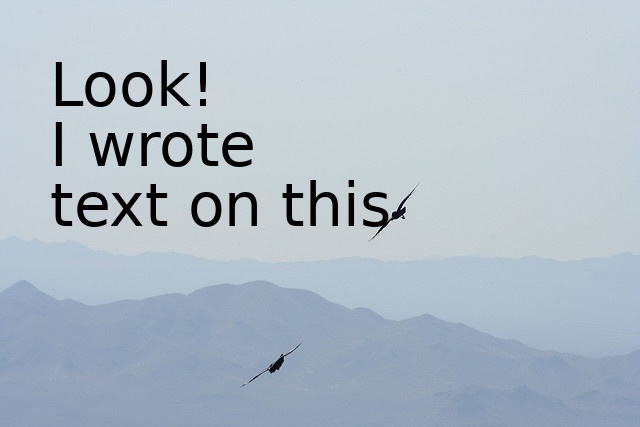

In [29]:
# Create a test image with text
from PIL import Image, ImageDraw, ImageFont
import numpy as np

file_path = dataset.first().filepath

img = Image.open(file_path)

draw = ImageDraw.Draw(img)

# Add some sample text
text = "Look!\nI wrote\ntext on this"

# Try to get a font, fall back to default if not found
try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 60)
except:
    font = ImageFont.load_default()

# Draw the text in black
draw.text((50, 50), text, fill='black', font=font)

# Save the image
img.save(file_path)

# Display the image
display(img)



Basic OCR ("ocr") requires no additional parameters and returns text strings. For OCR with region information (`ocr_with_region`), you can set `store_region_info=True` to include bounding boxes for each text region:

In [30]:
model.operation="ocr"

model.store_region_info=True

dataset.apply_model(model, label_field="text_regions")

   0% ||--------------------| 0/3 [3.6ms elapsed, ? remaining, ? samples/s] 

Prediction failed: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
Traceback (most recent call last):
  File "/home/harpreet/fiftyone/__models__/florence2/zoo.py", line 553, in predict
    result = self._predict(pil_image, sample)  # Pass sample through to _predict
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/harpreet/fiftyone/__models__/florence2/zoo.py", line 542, in _predict
    return predict_method(image)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/harpreet/fiftyone/__models__/florence2/zoo.py", line 468, in _predict_ocr
    parsed_answer = self._generate_and_parse(image, task)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/harpreet/fiftyone/__models__/florence2/zoo.py", line 328, in _generate_and_parse
    

Sample: 67ed5e87f5b8923aa58195d6                                            
Error: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Sample: 67ed5e87f5b8923aa581957d
Error: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Sample: 67ed5e87f5b8923aa58195d5
Error: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-

In [ ]:
dataset.first()['text_regions']

In [ ]:
model.store_region_info=False

dataset.apply_model(model, label_field="text_regions_no_region_info")

In [ ]:
dataset.first()['text_regions_no_region_info']